# Thyroid Disease Classification Using Multi-layer Perceptron Neural Network

In [1]:
# Import Required Libraries

import pandas as pd

In [2]:
# Load the datasets.

df_train = pd.read_csv('norm-ann-train.csv')
df_test = pd.read_csv('norm-ann-test.csv')

In [3]:
len(df_train)

3772

In [4]:
len(df_test)

3428

In [5]:
print(df_train.head(n=5))

    age  sex_0  sex_1  on_thyroxine_0  on_thyroxine_1  query_thyroxine_0  \
0  0.73      1      0               0               1                  1   
1  0.24      1      0               1               0                  1   
2  0.47      1      0               1               0                  1   
3  0.64      0      1               1               0                  1   
4  0.23      1      0               1               0                  1   

   query_thyroxine_1  on_antithyroid_meds_0  on_antithyroid_meds_1  sick_0  \
0                  0                      1                      0       1   
1                  0                      1                      0       1   
2                  0                      1                      0       1   
3                  0                      1                      0       1   
4                  0                      1                      0       1   

   ...    hypoituitary_0  hypoituitary_1  psych_0  psych_1       TSH  \
0 

In [6]:
# See the first sample.
df_train.loc[0]

age                      0.730000
sex_0                    1.000000
sex_1                    0.000000
on_thyroxine_0           0.000000
on_thyroxine_1           1.000000
query_thyroxine_0        1.000000
query_thyroxine_1        0.000000
on_antithyroid_meds_0    1.000000
on_antithyroid_meds_1    0.000000
sick_0                   1.000000
sick_1                   0.000000
pregnant_0               1.000000
pregnant_1               0.000000
thyroid_surgery_0        1.000000
thyroid_surgery_1        0.000000
T131_treat_0             0.000000
T131_treat_1             1.000000
query_hypothyroid_0      1.000000
query_hypothyroid_1      0.000000
query_hyperthyroid_0     1.000000
query_hyperthyroid_1     0.000000
lithium_0                1.000000
lithium_1                0.000000
goitre_0                 1.000000
goitre_1                 0.000000
tumor_0                  1.000000
tumor_1                  0.000000
hypoituitary_0           1.000000
hypoituitary_1           0.000000
psych_0       

In [7]:
# See a summary of the dataset.
print(df_train.describe())

               age        sex_0        sex_1  on_thyroxine_0  on_thyroxine_1  \
count  3772.000000  3772.000000  3772.000000     3772.000000     3772.000000   
mean      0.515102     0.696978     0.303022        0.876723        0.123277   
std       0.189525     0.459626     0.459626        0.328798        0.328798   
min       0.010000     0.000000     0.000000        0.000000        0.000000   
25%       0.360000     0.000000     0.000000        1.000000        0.000000   
50%       0.540000     1.000000     0.000000        1.000000        0.000000   
75%       0.670000     1.000000     1.000000        1.000000        0.000000   
max       0.940000     1.000000     1.000000        1.000000        1.000000   

       query_thyroxine_0  query_thyroxine_1  on_antithyroid_meds_0  \
count        3772.000000        3772.000000            3772.000000   
mean            0.987010           0.012990               0.988600   
std             0.113248           0.113248               0.106174   

In [8]:
# Check for NAs in each column.

df_train.count(axis=0)

age                      3772
sex_0                    3772
sex_1                    3772
on_thyroxine_0           3772
on_thyroxine_1           3772
query_thyroxine_0        3772
query_thyroxine_1        3772
on_antithyroid_meds_0    3772
on_antithyroid_meds_1    3772
sick_0                   3772
sick_1                   3772
pregnant_0               3772
pregnant_1               3772
thyroid_surgery_0        3772
thyroid_surgery_1        3772
T131_treat_0             3772
T131_treat_1             3772
query_hypothyroid_0      3772
query_hypothyroid_1      3772
query_hyperthyroid_0     3772
query_hyperthyroid_1     3772
lithium_0                3772
lithium_1                3772
goitre_0                 3772
goitre_1                 3772
tumor_0                  3772
tumor_1                  3772
hypoituitary_0           3772
hypoituitary_1           3772
psych_0                  3772
psych_1                  3772
TSH                      3772
T3                       3772
TT4       

In [9]:
df_train['class'].value_counts(ascending=True)

1      93
2     191
3    3488
Name: class, dtype: int64

In [10]:
# Prepare the feature and label datasets.

df_train_x = df_train.drop('class', axis=1)
df_train_y = df_train['class']

df_test_x = df_test.drop('class', axis=1)
df_test_y = df_test['class']

In [11]:
print(df_train_x.head(n=3))

    age  sex_0  sex_1  on_thyroxine_0  on_thyroxine_1  query_thyroxine_0  \
0  0.73      1      0               0               1                  1   
1  0.24      1      0               1               0                  1   
2  0.47      1      0               1               0                  1   

   query_thyroxine_1  on_antithyroid_meds_0  on_antithyroid_meds_1  sick_0  \
0                  0                      1                      0       1   
1                  0                      1                      0       1   
2                  0                      1                      0       1   

     ...     tumor_1  hypoituitary_0  hypoituitary_1  psych_0  psych_1  \
0    ...           0               1               0        1        0   
1    ...           0               1               0        1        0   
2    ...           0               1               0        1        0   

        TSH        T3       TT4       T4U       FTI  
0  0.001132  0.137571  0.275701

In [12]:
df_train_x.shape

(3772, 36)

In [13]:
df_train_x.dtypes

age                      float64
sex_0                      int64
sex_1                      int64
on_thyroxine_0             int64
on_thyroxine_1             int64
query_thyroxine_0          int64
query_thyroxine_1          int64
on_antithyroid_meds_0      int64
on_antithyroid_meds_1      int64
sick_0                     int64
sick_1                     int64
pregnant_0                 int64
pregnant_1                 int64
thyroid_surgery_0          int64
thyroid_surgery_1          int64
T131_treat_0               int64
T131_treat_1               int64
query_hypothyroid_0        int64
query_hypothyroid_1        int64
query_hyperthyroid_0       int64
query_hyperthyroid_1       int64
lithium_0                  int64
lithium_1                  int64
goitre_0                   int64
goitre_1                   int64
tumor_0                    int64
tumor_1                    int64
hypoituitary_0             int64
hypoituitary_1             int64
psych_0                    int64
psych_1   

In [14]:
df_train_y.values

array([3, 3, 3, ..., 2, 3, 3])

In [15]:
df_train_y.dtype

dtype('int64')

In [16]:
import numpy as np

np.unique(df_train_y.values)

array([1, 2, 3])

In [17]:
# Convert the labels to one hot encoding

#def to_one_hot(labels, dimension=3):
#    results = np.zeros((len(labels), dimension))
#    for i, label in enumerate(labels):
#        results[i, label] = 1.
#    return results

def to_one_hot(labels):
    unique_labels = np.unique(labels)
    dimension = len(unique_labels)
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, np.where(unique_labels==label)] = 1.
    return results

In [18]:
#one_hot_train_y = to_one_hot(df_train_y.values, 4)
one_hot_train_y = to_one_hot(df_train_y.values)
one_hot_train_y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [19]:
one_hot_train_y.dtype

dtype('float64')

In [20]:
one_hot_train_y.shape

(3772, 3)

In [21]:
one_hot_test_y = to_one_hot(df_test_y.values)
one_hot_test_y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

# Build the Model

In [22]:
# Model Definition

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(36,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [23]:
# Compile the Model.

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Training the model

history = model.fit(df_train_x,
                    one_hot_train_y,
                    epochs=50,
                    batch_size=128,
                    validation_data=(df_test_x, one_hot_test_y))

Train on 3772 samples, validate on 3428 samples
Epoch 1/50
3772/3772 [==============================] - 0s 93us/step - loss: 0.4653 - acc: 0.8834 - val_loss: 0.3021 - val_acc: 0.9271
Epoch 2/50
3772/3772 [==============================] - 0s 36us/step - loss: 0.3066 - acc: 0.9247 - val_loss: 0.2947 - val_acc: 0.9271
Epoch 3/50
3772/3772 [==============================] - 0s 34us/step - loss: 0.2966 - acc: 0.9247 - val_loss: 0.2872 - val_acc: 0.9271
Epoch 4/50
3772/3772 [==============================] - 0s 36us/step - loss: 0.2879 - acc: 0.9247 - val_loss: 0.2719 - val_acc: 0.9271
Epoch 5/50
3772/3772 [==============================] - 0s 52us/step - loss: 0.2768 - acc: 0.9247 - val_loss: 0.2697 - val_acc: 0.9271
Epoch 6/50
3772/3772 [==============================] - 0s 36us/step - loss: 0.2675 - acc: 0.9252 - val_loss: 0.2569 - val_acc: 0.9282
Epoch 7/50
3772/3772 [==============================] - 0s 35us/step - loss: 0.2574 - acc: 0.9258 - val_loss: 0.2514 - val_acc: 0.9285
Epoch 8

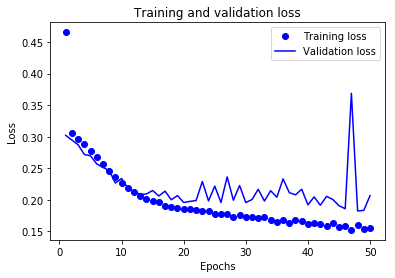

In [26]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

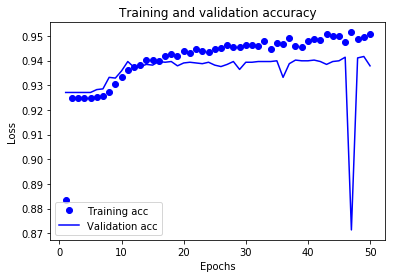

In [27]:
# Plotting the training and validation accuracy

plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
# Try a different optimiser SGD instead of RMSprop. This is plain vanilla gradient descent whereas PMSprop is adaptive.

# Model Definition

model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape=(36,)))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

In [29]:
# Compile the Model.

model1.compile(optimizer='SGD',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [30]:
# Training the model

history1 = model1.fit(df_train_x,
                      one_hot_train_y,
                      epochs=50,
                      batch_size=128,
                      validation_data=(df_test_x, one_hot_test_y))

Train on 3772 samples, validate on 3428 samples
Epoch 1/50
3772/3772 [==============================] - 0s 115us/step - loss: 0.5027 - acc: 0.9088 - val_loss: 0.3450 - val_acc: 0.9271
Epoch 2/50
3772/3772 [==============================] - 0s 50us/step - loss: 0.3334 - acc: 0.9247 - val_loss: 0.3209 - val_acc: 0.9271
Epoch 3/50
3772/3772 [==============================] - 0s 51us/step - loss: 0.3225 - acc: 0.9247 - val_loss: 0.3147 - val_acc: 0.9271
Epoch 4/50
3772/3772 [==============================] - 0s 50us/step - loss: 0.3191 - acc: 0.9247 - val_loss: 0.3118 - val_acc: 0.9271
Epoch 5/50
3772/3772 [==============================] - 0s 50us/step - loss: 0.3173 - acc: 0.9247 - val_loss: 0.3099 - val_acc: 0.9271
Epoch 6/50
3772/3772 [==============================] - 0s 48us/step - loss: 0.3161 - acc: 0.9247 - val_loss: 0.3086 - val_acc: 0.9271
Epoch 7/50
3772/3772 [==============================] - 0s 56us/step - loss: 0.3152 - acc: 0.9247 - val_loss: 0.3077 - val_acc: 0.9271
Epoch 

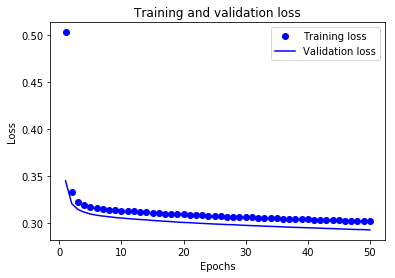

In [31]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs1 = range(1, len(loss1) + 1)

plt.plot(epochs1, loss1, 'bo', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

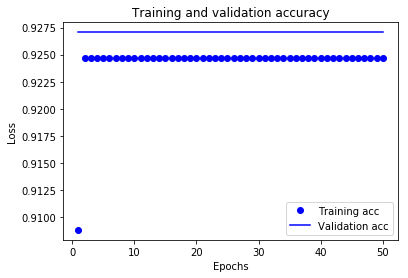

In [32]:
# Plotting the training and validation accuracy

plt.clf()

acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

plt.plot(epochs1, acc1, 'bo', label='Training acc')
plt.plot(epochs1, val_acc1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
print(df_test_y.values)
np.unique(df_test_y.values)

[2 3 3 ... 3 3 3]


array([1, 2, 3])

In [34]:
# Show the confusion matrix for the first model.

print(model.predict_classes(df_test_x))
np.unique(model.predict_classes(df_test_x))

[2 2 2 ... 2 2 2]


array([0, 1, 2])

In [35]:
# Confusion Matrix for the 1st Model

from pandas_ml import ConfusionMatrix

y_pred = model.predict_classes(df_test_x)
y_pred += 1

confusion_matrix = ConfusionMatrix(df_test_y.values, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted   1   2     3  __all__
Actual                          
1          66   4     3       73
2           8  41   128      177
3          24  46  3108     3178
__all__    98  91  3239     3428


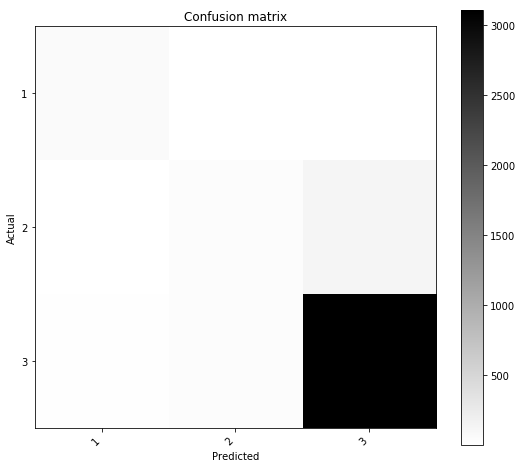

In [36]:
confusion_matrix.plot()
plt.show()

In [37]:
confusion_matrix.print_stats()

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


Confusion Matrix:

Predicted   1   2     3  __all__
Actual                          
1          66   4     3       73
2           8  41   128      177
3          24  46  3108     3178
__all__    98  91  3239     3428


Overall Statistics:

Accuracy: 0.9378646441073513
95% CI: (0.9292573978502386, 0.9457152935981166)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.9647612051736237
Kappa: 0.49095533195155283
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                        1          2          3
Population                                  3428       3428       3428
P: Condition positive                         73        177       3178
N: Condition negative                       3355       3251        250
Test outcome positive                         98         91       3239
Test outcome negative                       3330       3337        189
TP: True Positive                             66         41       3108
TN: True Negative                         

In [38]:
np.unique(df_train_y)

array([1, 2, 3])

In [40]:
np.unique(df_test_y)

array([1, 2, 3])

In [41]:
# convert labels to 0, 1, 2

df_train_y_rescale = df_train_y - 1
df_test_y_rescale = df_test_y - 1

np.unique(df_train_y_rescale)

array([0, 1, 2])

In [44]:
# Try using integer labels.

model0 = models.Sequential()
model0.add(layers.Dense(64, activation='relu', input_shape=(36,)))
model0.add(layers.Dense(64, activation='relu'))
model0.add(layers.Dense(3, activation='softmax'))

model0.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history0 = model0.fit(df_train_x,
                      df_train_y_rescale,
                      epochs=50,
                      batch_size=128,
                      validation_data=(df_test_x, df_test_y_rescale))

Train on 3772 samples, validate on 3428 samples
Epoch 1/50
3772/3772 [==============================] - 0s 95us/step - loss: 0.4318 - acc: 0.8839 - val_loss: 0.3000 - val_acc: 0.9271
Epoch 2/50
3772/3772 [==============================] - 0s 35us/step - loss: 0.3050 - acc: 0.9247 - val_loss: 0.2952 - val_acc: 0.9271
Epoch 3/50
3772/3772 [==============================] - 0s 33us/step - loss: 0.2981 - acc: 0.9247 - val_loss: 0.2849 - val_acc: 0.9271
Epoch 4/50
3772/3772 [==============================] - 0s 32us/step - loss: 0.2910 - acc: 0.9247 - val_loss: 0.2838 - val_acc: 0.9271
Epoch 5/50
3772/3772 [==============================] - 0s 34us/step - loss: 0.2827 - acc: 0.9247 - val_loss: 0.2703 - val_acc: 0.9271
Epoch 6/50
3772/3772 [==============================] - 0s 34us/step - loss: 0.2739 - acc: 0.9247 - val_loss: 0.2605 - val_acc: 0.9271
Epoch 7/50
3772/3772 [==============================] - 0s 40us/step - loss: 0.2605 - acc: 0.9247 - val_loss: 0.2495 - val_acc: 0.9285
Epoch 8

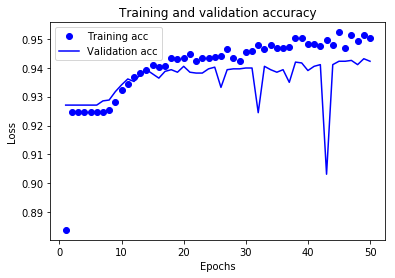

In [45]:
# Plotting the training and validation accuracy

plt.clf()

acc0 = history0.history['acc']
val_acc0 = history0.history['val_acc']

epochs0 = range(1, len(loss) + 1)

plt.plot(epochs0, acc0, 'bo', label='Training acc')
plt.plot(epochs0, val_acc0, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Perform Cross-validation on First Model

In [46]:
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
    
    # create model
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(36,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))	# Compile model
    
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [47]:
# Create model.

model2 = KerasClassifier(build_fn=create_model, epochs=16, batch_size=128, verbose=2)

In [48]:
from sklearn.model_selection import KFold

seed = 123
np.random.seed(seed)
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

In [49]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'f1_macro', 'f1_micro']
scores = cross_validate(model2, df_train_x, y=df_train_y_rescale, scoring=scoring, cv=kfold, verbose=2, return_train_score=True)

[CV]  ................................................................
Epoch 1/16
 - 0s - loss: 0.4875 - acc: 0.8636
Epoch 2/16
 - 0s - loss: 0.3054 - acc: 0.9260
Epoch 3/16
 - 0s - loss: 0.2973 - acc: 0.9260
Epoch 4/16
 - 0s - loss: 0.2918 - acc: 0.9260
Epoch 5/16
 - 0s - loss: 0.2841 - acc: 0.9260
Epoch 6/16
 - 0s - loss: 0.2784 - acc: 0.9260
Epoch 7/16
 - 0s - loss: 0.2715 - acc: 0.9260
Epoch 8/16
 - 0s - loss: 0.2608 - acc: 0.9260
Epoch 9/16
 - 0s - loss: 0.2554 - acc: 0.9268
Epoch 10/16
 - 0s - loss: 0.2522 - acc: 0.9276
Epoch 11/16
 - 0s - loss: 0.2468 - acc: 0.9280
Epoch 12/16
 - 0s - loss: 0.2355 - acc: 0.9292
Epoch 13/16
 - 0s - loss: 0.2293 - acc: 0.9316
Epoch 14/16
 - 0s - loss: 0.2252 - acc: 0.9316
Epoch 15/16
 - 0s - loss: 0.2189 - acc: 0.9356
Epoch 16/16
 - 0s - loss: 0.2108 - acc: 0.9356
[CV] ................................................. , total=   1.6s
[CV]  ................................................................


/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


Epoch 1/16
 - 0s - loss: 0.4251 - acc: 0.9185
Epoch 2/16
 - 0s - loss: 0.3166 - acc: 0.9221
Epoch 3/16
 - 0s - loss: 0.3072 - acc: 0.9221
Epoch 4/16
 - 0s - loss: 0.2981 - acc: 0.9221
Epoch 5/16
 - 0s - loss: 0.2939 - acc: 0.9221
Epoch 6/16
 - 0s - loss: 0.2832 - acc: 0.9221
Epoch 7/16
 - 0s - loss: 0.2775 - acc: 0.9221
Epoch 8/16
 - 0s - loss: 0.2690 - acc: 0.9229
Epoch 9/16
 - 0s - loss: 0.2629 - acc: 0.9237
Epoch 10/16
 - 0s - loss: 0.2541 - acc: 0.9237
Epoch 11/16
 - 0s - loss: 0.2498 - acc: 0.9260
Epoch 12/16
 - 0s - loss: 0.2412 - acc: 0.9272
Epoch 13/16
 - 0s - loss: 0.2383 - acc: 0.9300
Epoch 14/16
 - 0s - loss: 0.2315 - acc: 0.9332
Epoch 15/16
 - 0s - loss: 0.2240 - acc: 0.9344
Epoch 16/16
 - 0s - loss: 0.2200 - acc: 0.9352
[CV] ................................................. , total=   1.7s
[CV]  ................................................................
Epoch 1/16
 - 0s - loss: 0.6168 - acc: 0.7932
Epoch 2/16
 - 0s - loss: 0.3090 - acc: 0.9260
Epoch 3/16
 - 0s - loss

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.0s finished


In [50]:
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_macro',
 'test_f1_micro',
 'train_accuracy',
 'train_f1_macro',
 'train_f1_micro']

In [52]:
scores['test_accuracy']

array([0.93163752, 0.93953858, 0.93396977])

In [53]:
scores

{'fit_time': array([1.47296715, 1.58021855, 1.48072338]),
 'score_time': array([0.09102249, 0.0955689 , 0.1053443 ]),
 'test_accuracy': array([0.93163752, 0.93953858, 0.93396977]),
 'train_accuracy': array([0.933572  , 0.93558648, 0.94115308]),
 'test_f1_macro': array([0.4993301 , 0.51542289, 0.54360101]),
 'train_f1_macro': array([0.48212897, 0.55783602, 0.57448669]),
 'test_f1_micro': array([0.93163752, 0.93953858, 0.93396977]),
 'train_f1_micro': array([0.933572  , 0.93558648, 0.94115308])}

# Tuning Hyper Parameters with Cross-validation

In [54]:
param_grid = [
  {'layer1': [32, 64], 'layer2': [0, 32, 64], 'layer3': [0]},
  {'layer1': [32, 64], 'layer2': [32, 64], 'layer3': [32, 64]},
 ]

In [55]:
# Function to create model, required for KerasClassifier
def create_model_gscv(layer1 = 64, layer2 = 64, layer3 = 64):
    
    # create model
    model = models.Sequential()
    
    # Hidden layers
    model.add(layers.Dense(layer1, activation='relu', input_shape=(36,)))
    if (layer2 > 0) :
        model.add(layers.Dense(layer2, activation='relu'))
    if (layer3 > 0) :
        model.add(layers.Dense(layer3, activation='relu'))

    # Output layer
    model.add(layers.Dense(3, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [61]:
model3 = KerasClassifier(build_fn=create_model_gscv, epochs=16, batch_size=128, verbose=2)

In [62]:
from sklearn.model_selection import GridSearchCV

#grid = GridSearchCV(estimator=model3, param_grid=param_grid, scoring={'acc':'accuracy', 'f1':'f1_macro'}, n_jobs=1, cv=kfold, refit=False, verbose=2, return_train_score=True)
grid = GridSearchCV(estimator=model3, param_grid=param_grid, n_jobs=1, cv=kfold, refit=True, verbose=2, return_train_score=True)
#grid = GridSearchCV(estimator=model3, param_grid=param_grid)
grid_result = grid.fit(df_train_x, df_train_y_rescale)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] layer1=32, layer2=0, layer3=0 ...................................
Epoch 1/16
 - 3s - loss: 0.9004 - acc: 0.5899
Epoch 2/16
 - 0s - loss: 0.4595 - acc: 0.9260
Epoch 3/16
 - 0s - loss: 0.3377 - acc: 0.9260
Epoch 4/16
 - 0s - loss: 0.3101 - acc: 0.9260
Epoch 5/16
 - 0s - loss: 0.3026 - acc: 0.9260
Epoch 6/16
 - 0s - loss: 0.2985 - acc: 0.9260
Epoch 7/16
 - 0s - loss: 0.2959 - acc: 0.9260
Epoch 8/16
 - 0s - loss: 0.2928 - acc: 0.9260
Epoch 9/16
 - 0s - loss: 0.2899 - acc: 0.9260
Epoch 10/16
 - 0s - loss: 0.2880 - acc: 0.9260
Epoch 11/16
 - 0s - loss: 0.2860 - acc: 0.9260
Epoch 12/16
 - 0s - loss: 0.2830 - acc: 0.9260
Epoch 13/16
 - 0s - loss: 0.2805 - acc: 0.9260
Epoch 14/16
 - 0s - loss: 0.2769 - acc: 0.9260
Epoch 15/16
 - 0s - loss: 0.2745 - acc: 0.9260
Epoch 16/16
 - 0s - loss: 0.2727 - acc: 0.9260
[CV] .................... layer1=32, layer2=0, layer3=0, total=   5.5s
[CV] layer1=32, layer2=0, layer3=0 ...................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


Epoch 1/16
 - 2s - loss: 0.9115 - acc: 0.5598
Epoch 2/16
 - 0s - loss: 0.4087 - acc: 0.9221
Epoch 3/16
 - 0s - loss: 0.3248 - acc: 0.9221
Epoch 4/16
 - 0s - loss: 0.3164 - acc: 0.9221
Epoch 5/16
 - 0s - loss: 0.3138 - acc: 0.9221
Epoch 6/16
 - 0s - loss: 0.3101 - acc: 0.9221
Epoch 7/16
 - 0s - loss: 0.3071 - acc: 0.9221
Epoch 8/16
 - 0s - loss: 0.3039 - acc: 0.9221
Epoch 9/16
 - 0s - loss: 0.3024 - acc: 0.9221
Epoch 10/16
 - 0s - loss: 0.2999 - acc: 0.9221
Epoch 11/16
 - 0s - loss: 0.2972 - acc: 0.9221
Epoch 12/16
 - 0s - loss: 0.2949 - acc: 0.9221
Epoch 13/16
 - 0s - loss: 0.2924 - acc: 0.9221
Epoch 14/16
 - 0s - loss: 0.2902 - acc: 0.9221
Epoch 15/16
 - 0s - loss: 0.2873 - acc: 0.9221
Epoch 16/16
 - 0s - loss: 0.2847 - acc: 0.9221
[CV] .................... layer1=32, layer2=0, layer3=0, total=   4.9s
[CV] layer1=32, layer2=0, layer3=0 ...................................
Epoch 1/16
 - 2s - loss: 1.3844 - acc: 0.2421
Epoch 2/16
 - 0s - loss: 0.4497 - acc: 0.9121
Epoch 3/16
 - 0s - loss

Epoch 6/16
 - 0s - loss: 0.3000 - acc: 0.9221
Epoch 7/16
 - 0s - loss: 0.2941 - acc: 0.9221
Epoch 8/16
 - 0s - loss: 0.2909 - acc: 0.9221
Epoch 9/16
 - 0s - loss: 0.2888 - acc: 0.9221
Epoch 10/16
 - 0s - loss: 0.2846 - acc: 0.9221
Epoch 11/16
 - 0s - loss: 0.2802 - acc: 0.9221
Epoch 12/16
 - 0s - loss: 0.2772 - acc: 0.9221
Epoch 13/16
 - 0s - loss: 0.2731 - acc: 0.9229
Epoch 14/16
 - 0s - loss: 0.2678 - acc: 0.9233
Epoch 15/16
 - 0s - loss: 0.2662 - acc: 0.9237
Epoch 16/16
 - 0s - loss: 0.2612 - acc: 0.9241
[CV] .................... layer1=64, layer2=0, layer3=0, total=   4.9s
[CV] layer1=64, layer2=0, layer3=0 ...................................
Epoch 1/16
 - 2s - loss: 0.9146 - acc: 0.6493
Epoch 2/16
 - 0s - loss: 0.3516 - acc: 0.9260
Epoch 3/16
 - 0s - loss: 0.3146 - acc: 0.9260
Epoch 4/16
 - 0s - loss: 0.3087 - acc: 0.9260
Epoch 5/16
 - 0s - loss: 0.3030 - acc: 0.9260
Epoch 6/16
 - 0s - loss: 0.2972 - acc: 0.9260
Epoch 7/16
 - 0s - loss: 0.2924 - acc: 0.9260
Epoch 8/16
 - 0s - loss

Epoch 11/16
 - 0s - loss: 0.2724 - acc: 0.9233
Epoch 12/16
 - 0s - loss: 0.2666 - acc: 0.9237
Epoch 13/16
 - 0s - loss: 0.2590 - acc: 0.9245
Epoch 14/16
 - 0s - loss: 0.2519 - acc: 0.9256
Epoch 15/16
 - 0s - loss: 0.2462 - acc: 0.9276
Epoch 16/16
 - 0s - loss: 0.2398 - acc: 0.9292
[CV] .................. layer1=32, layer2=32, layer3=32, total=   5.4s
[CV] layer1=32, layer2=32, layer3=32 .................................
Epoch 1/16
 - 3s - loss: 0.5877 - acc: 0.8203
Epoch 2/16
 - 0s - loss: 0.3109 - acc: 0.9260
Epoch 3/16
 - 0s - loss: 0.3034 - acc: 0.9260
Epoch 4/16
 - 0s - loss: 0.2992 - acc: 0.9260
Epoch 5/16
 - 0s - loss: 0.2930 - acc: 0.9260
Epoch 6/16
 - 0s - loss: 0.2873 - acc: 0.9260
Epoch 7/16
 - 0s - loss: 0.2838 - acc: 0.9260
Epoch 8/16
 - 0s - loss: 0.2763 - acc: 0.9260
Epoch 9/16
 - 0s - loss: 0.2723 - acc: 0.9260
Epoch 10/16
 - 0s - loss: 0.2664 - acc: 0.9260
Epoch 11/16
 - 0s - loss: 0.2571 - acc: 0.9260
Epoch 12/16
 - 0s - loss: 0.2516 - acc: 0.9260
Epoch 13/16
 - 0s - l

Epoch 16/16
 - 0s - loss: 0.2230 - acc: 0.9360
[CV] .................. layer1=32, layer2=64, layer3=64, total=   5.9s
[CV] layer1=32, layer2=64, layer3=64 .................................
Epoch 1/16
 - 3s - loss: 0.4461 - acc: 0.8795
Epoch 2/16
 - 0s - loss: 0.3095 - acc: 0.9260
Epoch 3/16
 - 0s - loss: 0.3069 - acc: 0.9260
Epoch 4/16
 - 0s - loss: 0.3021 - acc: 0.9260
Epoch 5/16
 - 0s - loss: 0.2970 - acc: 0.9260
Epoch 6/16
 - 0s - loss: 0.2911 - acc: 0.9260
Epoch 7/16
 - 0s - loss: 0.2850 - acc: 0.9260
Epoch 8/16
 - 0s - loss: 0.2789 - acc: 0.9260
Epoch 9/16
 - 0s - loss: 0.2683 - acc: 0.9260
Epoch 10/16
 - 0s - loss: 0.2597 - acc: 0.9260
Epoch 11/16
 - 0s - loss: 0.2523 - acc: 0.9264
Epoch 12/16
 - 0s - loss: 0.2362 - acc: 0.9284
Epoch 13/16
 - 0s - loss: 0.2277 - acc: 0.9332
Epoch 14/16
 - 0s - loss: 0.2220 - acc: 0.9356
Epoch 15/16
 - 0s - loss: 0.2151 - acc: 0.9384
Epoch 16/16
 - 0s - loss: 0.2066 - acc: 0.9400
[CV] .................. layer1=32, layer2=64, layer3=64, total=   5.

Epoch 2/16
 - 0s - loss: 0.3085 - acc: 0.9260
Epoch 3/16
 - 0s - loss: 0.3016 - acc: 0.9260
Epoch 4/16
 - 0s - loss: 0.2951 - acc: 0.9260
Epoch 5/16
 - 0s - loss: 0.2898 - acc: 0.9260
Epoch 6/16
 - 0s - loss: 0.2834 - acc: 0.9260
Epoch 7/16
 - 0s - loss: 0.2757 - acc: 0.9260
Epoch 8/16
 - 0s - loss: 0.2680 - acc: 0.9260
Epoch 9/16
 - 0s - loss: 0.2602 - acc: 0.9264
Epoch 10/16
 - 0s - loss: 0.2516 - acc: 0.9264
Epoch 11/16
 - 0s - loss: 0.2459 - acc: 0.9280
Epoch 12/16
 - 0s - loss: 0.2319 - acc: 0.9308
Epoch 13/16
 - 0s - loss: 0.2219 - acc: 0.9352
Epoch 14/16
 - 0s - loss: 0.2162 - acc: 0.9360
Epoch 15/16
 - 0s - loss: 0.2085 - acc: 0.9416
Epoch 16/16
 - 0s - loss: 0.2061 - acc: 0.9416
[CV] .................. layer1=64, layer2=64, layer3=32, total=   6.4s
[CV] layer1=64, layer2=64, layer3=64 .................................
Epoch 1/16
 - 3s - loss: 0.4981 - acc: 0.8771
Epoch 2/16
 - 0s - loss: 0.3077 - acc: 0.9260
Epoch 3/16
 - 0s - loss: 0.3040 - acc: 0.9260
Epoch 4/16
 - 0s - loss

[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:  3.9min finished


Epoch 1/16
 - 3s - loss: 0.4197 - acc: 0.8905
Epoch 2/16
 - 0s - loss: 0.3100 - acc: 0.9247
Epoch 3/16
 - 0s - loss: 0.2999 - acc: 0.9247
Epoch 4/16
 - 0s - loss: 0.2886 - acc: 0.9247
Epoch 5/16
 - 0s - loss: 0.2755 - acc: 0.9247
Epoch 6/16
 - 0s - loss: 0.2605 - acc: 0.9255
Epoch 7/16
 - 0s - loss: 0.2446 - acc: 0.9274
Epoch 8/16
 - 0s - loss: 0.2343 - acc: 0.9311
Epoch 9/16
 - 0s - loss: 0.2203 - acc: 0.9361
Epoch 10/16
 - 0s - loss: 0.2165 - acc: 0.9380
Epoch 11/16
 - 0s - loss: 0.2042 - acc: 0.9385
Epoch 12/16
 - 0s - loss: 0.2034 - acc: 0.9417
Epoch 13/16
 - 0s - loss: 0.1971 - acc: 0.9422
Epoch 14/16
 - 0s - loss: 0.1901 - acc: 0.9422
Epoch 15/16
 - 0s - loss: 0.1884 - acc: 0.9427
Epoch 16/16
 - 0s - loss: 0.1908 - acc: 0.9419


In [63]:
# Summarize results.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.939820 using {'layer1': 64, 'layer2': 64, 'layer3': 64}
0.924708 (0.003735) with: {'layer1': 32, 'layer2': 0, 'layer3': 0}
0.924708 (0.003735) with: {'layer1': 32, 'layer2': 32, 'layer3': 0}
0.929480 (0.001370) with: {'layer1': 32, 'layer2': 64, 'layer3': 0}
0.925769 (0.003673) with: {'layer1': 64, 'layer2': 0, 'layer3': 0}
0.932927 (0.000968) with: {'layer1': 64, 'layer2': 32, 'layer3': 0}
0.934783 (0.003940) with: {'layer1': 64, 'layer2': 64, 'layer3': 0}
0.933722 (0.002949) with: {'layer1': 32, 'layer2': 32, 'layer3': 32}
0.938494 (0.001346) with: {'layer1': 32, 'layer2': 32, 'layer3': 64}
0.939555 (0.002358) with: {'layer1': 32, 'layer2': 64, 'layer3': 32}
0.939290 (0.005680) with: {'layer1': 32, 'layer2': 64, 'layer3': 64}
0.935578 (0.003247) with: {'layer1': 64, 'layer2': 32, 'layer3': 32}
0.939024 (0.004184) with: {'layer1': 64, 'layer2': 32, 'layer3': 64}
0.937699 (0.004932) with: {'layer1': 64, 'layer2': 64, 'layer3': 32}
0.939820 (0.001368) with: {'layer1': 64, 'layer

In [64]:
confusion_matrix3 = ConfusionMatrix(df_test_y_rescale, grid_result.predict(df_test_x))
print("Confusion matrix:\n%s" % confusion_matrix3)

Confusion matrix:
Predicted   0  1     2  __all__
Actual                         
0          60  0    13       73
1           3  2   172      177
2          22  1  3155     3178
__all__    85  3  3340     3428


In [65]:
confusion_matrix3.print_stats()

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


Confusion Matrix:

Predicted   0  1     2  __all__
Actual                         
0          60  0    13       73
1           3  2   172      177
2          22  1  3155     3178
__all__    85  3  3340     3428


Overall Statistics:

Accuracy: 0.9384480746791132
95% CI: (0.9298757652092694, 0.9462627027140604)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.9999999999999999
Kappa: 0.35986363732910437
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         0            1           2
Population                                   3428         3428        3428
P: Condition positive                          73          177        3178
N: Condition negative                        3355         3251         250
Test outcome positive                          85            3        3340
Test outcome negative                        3343         3425          88
TP: True Positive                              60            2        3155
TN: True Negative   

In [73]:
# Retrain the final model.

# create model
final_model = models.Sequential()


# Hidden layers
final_model.add(layers.Dense(64, activation='relu', input_shape=(36,)))
final_model.add(layers.Dense(64, activation='relu'))
final_model.add(layers.Dense(64, activation='relu'))

# Output layer
final_model.add(layers.Dense(3, activation='softmax'))
    
# Compile model
final_model.compile(optimizer='rmsprop',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Training the model
history_final = final_model.fit(df_train_x,
                                df_train_y_rescale,
                                epochs=16,
                                batch_size=128,
                                validation_data=(df_test_x, df_test_y_rescale))

Train on 3772 samples, validate on 3428 samples
Epoch 1/16
3772/3772 [==============================] - 4s 967us/step - loss: 0.4029 - acc: 0.8937 - val_loss: 0.3041 - val_acc: 0.9271
Epoch 2/16
3772/3772 [==============================] - 0s 59us/step - loss: 0.3063 - acc: 0.9247 - val_loss: 0.2947 - val_acc: 0.9271
Epoch 3/16
3772/3772 [==============================] - 0s 58us/step - loss: 0.2988 - acc: 0.9247 - val_loss: 0.2839 - val_acc: 0.9271
Epoch 4/16
3772/3772 [==============================] - 0s 57us/step - loss: 0.2899 - acc: 0.9247 - val_loss: 0.2808 - val_acc: 0.9271
Epoch 5/16
3772/3772 [==============================] - 0s 59us/step - loss: 0.2814 - acc: 0.9247 - val_loss: 0.2674 - val_acc: 0.9271
Epoch 6/16
3772/3772 [==============================] - 0s 57us/step - loss: 0.2712 - acc: 0.9247 - val_loss: 0.2586 - val_acc: 0.9271
Epoch 7/16
3772/3772 [==============================] - 0s 56us/step - loss: 0.2584 - acc: 0.9258 - val_loss: 0.2762 - val_acc: 0.9294
Epoch 

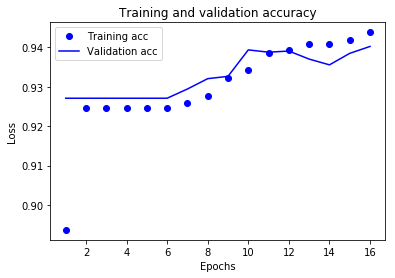

In [75]:
# Plotting the training and validation accuracy

plt.clf()

acc_final = history_final.history['acc']
val_acc_final = history_final.history['val_acc']

epochs_final = range(1, len(acc_final) + 1)

plt.plot(epochs_final, acc_final, 'bo', label='Training acc')
plt.plot(epochs_final, val_acc_final, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [78]:
# Save the final model.

final_model.save('mlp-imbalanced-data.h5')